In [364]:
import numpy as np
import pandas as pd
import os,sys,inspect
import scipy.stats as stats
import scipy.optimize as opt
from scipy.stats import norm
import scipy.integrate as integrate
from scipy.io import loadmat
import econtools 
import econtools.metrics as mt
import statsmodels.discrete.discrete_model as sm
import matplotlib.pyplot as plt
import itertools as it
import copy
import importlib
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# my functions
dirpath = os.getcwd()
i = 0
while(os.path.basename(dirpath) != "NU450_HW") and (i<=10):
    dirpath = os.path.dirname(dirpath)
    i = i + 1
targetdir = dirpath + '/450-3-HW1'
if targetdir not in sys.path:
    sys.path.insert(0,targetdir)

from single_agent_dynamics import est_func_step1_transitions
from single_agent_dynamics import est_func_step2_estimate_EV

from single_agent_dynamics import agent_choices
importlib.reload(est_func_step1_transitions)
importlib.reload(est_func_step2_estimate_EV)
importlib.reload(agent_choices)

<module 'single_agent_dynamics.agent_choices' from '/Users/jingyuanwang/GitHub/NU450_HW/450-3-HW1/single_agent_dynamics/agent_choices.py'>

In [365]:
%pdb ON

Automatic pdb calling has been turned ON


# Path

In [366]:
datapath = '/Users/jingyuanwang/Dropbox/Course/ECON/IO/NU450/NU450_HW/450-3-HW1/data'

# import data

In [367]:
df = pd.read_csv(datapath + '/ddc_pset.csv')

# ---- number of obs in each bin ---------- 
(31.4, 37.64]      5000
(37.64, 43.88]    20000
(43.88, 50.12]    41000
(50.12, 56.36]    29000
(56.36, 62.6]      5000
Name: rc, dtype: int64
# ---- average probability in each bin ---------- 


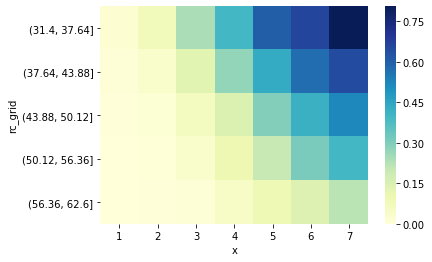

ERROR !!!!! maximum possible value exceed the lower bound, min(cdf_ub) = 0.8979256822861583
ERROR !!!!! minimum possible value exceed the upper bound, max(cdf_lp) = 0.09453891650935609


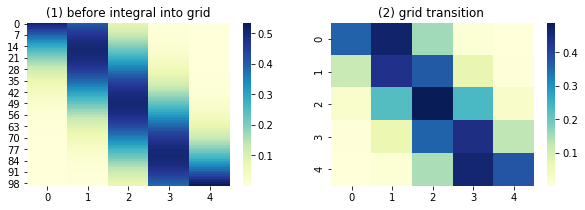

# ---- transition matrix for all states ---------- 


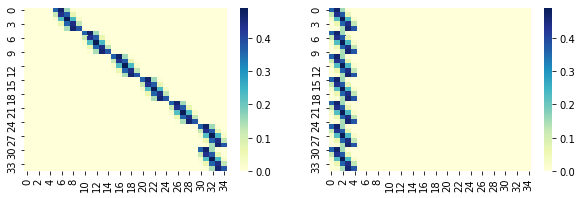

In [368]:
data = agent_choices.observations(df, n_rc_grids = 5, weight= True)

# estimation

In [369]:
importlib.reload(agent_choices)

<module 'single_agent_dynamics.agent_choices' from '/Users/jingyuanwang/GitHub/NU450_HW/450-3-HW1/single_agent_dynamics/agent_choices.py'>

In [370]:
estimation = agent_choices.estimation(data)

In [371]:
theta = np.array([0.67969334, 0.08648827])

In [372]:
estimation.get_loglikelihood(theta)

total iter : 446
final diff : 9.851042648278963e-09


80873.46488949604

In [373]:
theta0 = np.ones(2)

In [374]:
res1 =opt.minimize(estimation.get_loglikelihood, theta0, method='Nelder-Mead')

total iter : 480
final diff : 9.677421530795982e-09
total iter : 481
final diff : 9.68992708294536e-09
total iter : 480
final diff : 9.677677326180856e-09
total iter : 481
final diff : 9.691859759186627e-09
total iter : 481
final diff : 9.938730727299117e-09
total iter : 482
final diff : 9.910024800774409e-09
total iter : 483
final diff : 9.914742804539856e-09
total iter : 483
final diff : 9.899480346575729e-09
total iter : 483
final diff : 9.65965796240198e-09
total iter : 483
final diff : 9.651330401538871e-09
total iter : 480
final diff : 9.67443725130579e-09
total iter : 477
final diff : 9.959052249541855e-09
total iter : 476
final diff : 9.802363365452038e-09
total iter : 482
final diff : 9.719911986394436e-09
total iter : 484
final diff : 9.832660907704849e-09
total iter : 480
final diff : 9.901071962303831e-09
total iter : 479
final diff : 9.863072136795381e-09
total iter : 477
final diff : 9.618418062018463e-09
total iter : 481
final diff : 9.72227098827716e-09
total iter : 482

In [376]:
res1.x

array([0.40900415, 0.15501845])

In [386]:
EV, u, transition = estimation._get_continuation_values(res1.x, method='fixed_point')

total iter : 451
final diff : 9.879581597260767e-09


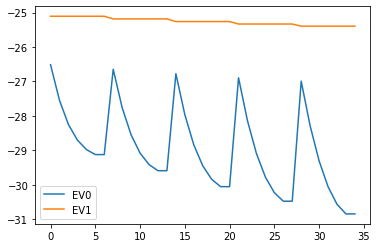

In [387]:
toplot_EV0 = EV['0'].reshape( (7,5) , order ='C').reshape( (1,35), order = 'F' )
toplot_EV1 = EV['1'].reshape( (7,5) , order ='C').reshape( (1,35), order = 'F' )
plt.plot(toplot_EV0.flatten(), label='EV0')
plt.plot(toplot_EV1.flatten(), label= 'EV1')
plt.legend()

# HM

In [379]:
theta0

array([1., 1.])

In [380]:
res2 =opt.minimize(lambda x: estimation.get_loglikelihood(x, method = 'H-Minversion'),
                   theta0, method='Nelder-Mead')

In [381]:
res2

 final_simplex: (array([[0.40901718, 0.15502816],
       [0.40902979, 0.15503433],
       [0.40897005, 0.15501693]]), array([34081.41006562, 34081.41007792, 34081.41011869]))
           fun: 34081.410065617885
       message: 'Optimization terminated successfully.'
          nfev: 113
           nit: 57
        status: 0
       success: True
             x: array([0.40901718, 0.15502816])

In [382]:
res2.x

array([0.40901718, 0.15502816])

In [383]:
res1.x

array([0.40900415, 0.15501845])

total iter : 451
final diff : 9.880295692710206e-09


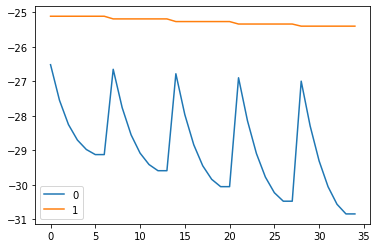

In [384]:
EV, u, transition = estimation._get_continuation_values(res2.x, method='fixed_point')
toplot_EV0 = EV['0'].reshape( (7,5) , order ='C').reshape( (1,35), order = 'F' )
toplot_EV1 = EV['1'].reshape( (7,5) , order ='C').reshape( (1,35), order = 'F' )
plt.plot(toplot_EV0.flatten(), label='0')
plt.plot(toplot_EV1.flatten(), label= '1')
plt.legend()

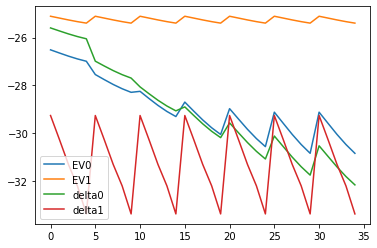

In [385]:
plt.plot(EV['0'], label='EV0')
plt.plot(EV['1'], label= 'EV1')
plt.plot(u['0']+0.95*EV['0'], label='delta0')
plt.plot(u['1']+0.95*EV['1'], label= 'delta1')
plt.legend()

## check the EV from 2 methods

In [391]:
EV1, _, _ = estimation._get_continuation_values(res1.x, method='fixed_point')
EV2, _, _ = estimation._get_continuation_values(res1.x, method='H-Minversion')

total iter : 451
final diff : 9.879581597260767e-09


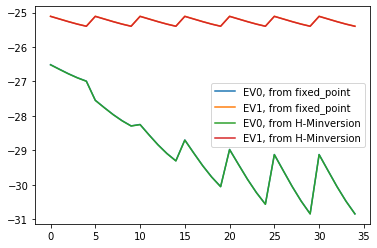

In [397]:
plt.plot(EV1['0'], label= 'EV0, from fixed_point')
plt.plot(EV1['1'], label= 'EV1, from fixed_point')
plt.plot(EV2['0'], label= 'EV0, from H-Minversion')
plt.plot(EV2['1'], label= 'EV1, from H-Minversion')
plt.legend()

# Appendix